## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ex1 import G
from ex2 import F
from ex5 import y2row
import time

## Helper Functions

In [2]:
def get_T_arrays(lattice_size, Temp):
    print("Getting T:")
    s = time.time()
    T_arrays = [[]] * lattice_size
    prev_T = [1] * pow(2, lattice_size)  # T_0
    for k in range(lattice_size-1):
        curr_T = calc_T(lattice_size, Temp, prev_T)
        T_arrays[k] = curr_T
        # print('T' + str(k+1) + ': ' + str(curr_T))
        prev_T = curr_T

    # Printing the last T, the normalizing factor Z_temp
    T_arrays[lattice_size - 1] = 0
    for y_last in range(pow(2, lattice_size)):
        y_last_vector = y2row(y_last, width=lattice_size)
        T_arrays[lattice_size-1] += curr_T[y_last] * G(y_last_vector, Temp)

    e = time.time()
    print("Done (" + str(round(e - s, 2)) + " secs).")
    return T_arrays


def calc_T(lattice_size, Temp, prev_T):
    T_vec = [0]*pow(2, lattice_size)
    res = 0
    for y2 in range(pow(2, lattice_size)):
        temp_sum = 0
        for y1 in range(pow(2, lattice_size)):
            y1_vector = y2row(y1, width=lattice_size)
            y2_vector = y2row(y2, width=lattice_size)
            temp_sum += G(y1_vector, Temp) * F(y1_vector, y2_vector, Temp)*prev_T[y1]
            # res += temp_res
        T_vec[y2] = temp_sum
    return T_vec


def get_p_k(k, ZTemp, T, lattice_size, Temp):
    k -= 1  # converting to array indexes (was in range 1,..,lattice_size)
    if k == lattice_size-1:  # for p_last(y_last)
        res_matrix = np.ndarray((2**lattice_size , 1), dtype=float)
        # res_matrix = [0] * pow(2, lattice_size)
        for y_last in range(pow(2, lattice_size)):
            y_last_vector = y2row(y_last, width=lattice_size)
            res_matrix[y_last] = (T[lattice_size-2][y_last] * G(y_last_vector, Temp)) / ZTemp
        return res_matrix
    elif k == 0:  # p_(1|2)(y1|y2)
        # res_matrix = [[0] * pow(2, lattice_size)] * pow(2, lattice_size)
        res_matrix = np.ndarray((2**lattice_size, 2**lattice_size), dtype=float)
        for y1 in range(pow(2, lattice_size)):
            y1_vector = y2row(y1, width=lattice_size)
            for y2 in range(pow(2, lattice_size)):
                y2_vector = y2row(y2, width=lattice_size)
                res_matrix[y1][y2] = (F(y1_vector, y2_vector, Temp) * G(y1_vector, Temp)) / T[0][y2]
        return res_matrix
    else:
        # res_matrix = [[0] * pow(2, lattice_size)] * pow(2, lattice_size)
        res_matrix = np.ndarray((2 ** lattice_size, 2 ** lattice_size), dtype=float)
        for y_k in range(pow(2, lattice_size)):
            y_k_vector = y2row(y_k, width=lattice_size)
            for y_kplus1 in range(pow(2, lattice_size)):
                y_kplus1_vector = y2row(y_kplus1, width=lattice_size)
                res_matrix[y_k][y_kplus1] = (F(y_k_vector, y_kplus1_vector, Temp) * G(y_k_vector, Temp) * T[k-1][y_k]) / T[k][y_kplus1]
        return res_matrix


def calc_p(ZTemp, T, lattice_size, Temp):
    print("Getting P:")
    s = time.time()
    p = []
    for k in range(1, lattice_size+1):
        p.append(get_p_k(k, ZTemp, T, lattice_size, Temp))
    e = time.time()
    print("Done (" + str(round(e - s, 2)) + " secs).")
    return p


def backward_sample(p, lattice_size):
    y = [0]*lattice_size
    y[lattice_size-1] = np.random.choice(pow(2, lattice_size), p=p[lattice_size-1][:, 0])
    k = lattice_size - 2
    while k >= 0:
        y[k] = np.random.choice(pow(2, lattice_size), p=p[k][:, y[k+1]])
        k -= 1
    # for k in range(lattice_size-1):
    #     prev_y = y_arr[lattice_size - k - 1]
    #     new_rand = np.random.choice(pow(2, lattice_size), p=p[lattice_size - k - 1][prev_y])
    #     y_arr[lattice_size-i - 2] = new_rand[0]
    return y


def convert_y_to_image(y, lattice_size):
    # image = [[]*lattice_size]*lattice_size
    image = np.ndarray((lattice_size, lattice_size))
    index = 0
    for i in range(len(y)):
        # row_values = [int(i) for i in list('{0:0b}'.format(row))]
        row = y2row(y[i], width=lattice_size)
        for j in range(len(row)):
            if row[j] == 0:
                row[j] = -1
        # missing_zeros = lattice_size - len(row_values)
        # padded_row_values = np.pad(row_values, (missing_zeros, 0), 'constant')
        # image[index] = padded_row_values
        # index += 1
        image[i] = row
    # np_image = np.array([arr for arr in image])
    return image

## Setup Variables

In [19]:
lattice_size = 8

Temps = [1.0, 1.5, 2.0]
NSAMPLES = 10

## Calculate T's & p's
Takes about 45 seconds for each *Temp*!

In [20]:
Ts = []
ps = []
for i, Temp in enumerate(Temps):
    print("Temp = " + str(Temp))
    Ts.append(get_T_arrays(lattice_size, Temp))
    ZTemp = Ts[i][-1]
    ps.append(calc_p(ZTemp, Ts[i], lattice_size, Temp))

Temp = 1.0
Getting T:
Done (25.06 secs).
Getting P:
Done (21.82 secs).
Temp = 1.5
Getting T:
Done (25.1 secs).
Getting P:
Done (22.16 secs).
Temp = 2.0
Getting T:
Done (25.63 secs).
Getting P:
Done (22.4 secs).


## Sample & Plot

Temp = 1.0
Sampling:
Done (0.01 secs).
---------------
Temp = 1.5
Sampling:
Done (0.01 secs).
---------------
Temp = 2.0
Sampling:
Done (0.01 secs).
---------------


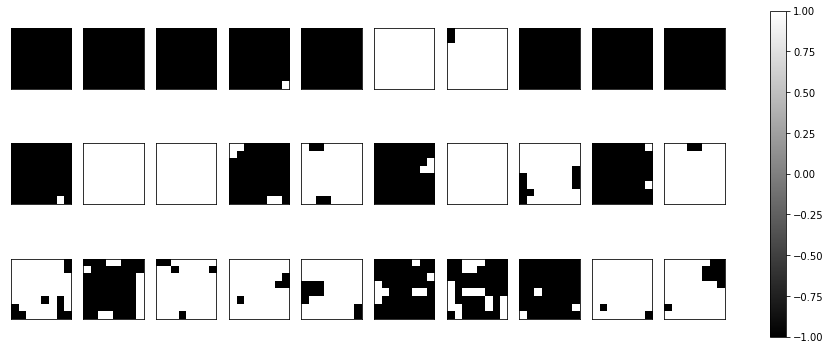

In [23]:
fig, ax = plt.subplots(len(Temps), NSAMPLES, figsize=(16, 6))
for i, Temp in enumerate(Temps):
    print("Temp = " + str(Temp))
    print("Sampling:")
    s = time.time()
    for n in range(NSAMPLES):
        y = backward_sample(ps[i], lattice_size)
        y_image = convert_y_to_image(y, lattice_size)
        t = ax[i, n].imshow(y_image, interpolation="None", vmin=-1, vmax=1, cmap="gray")
        ax[i, n].set_xticks([]), ax[i, n].set_yticks([])
    e = time.time()
    print("Done (" + str(round(e - s, 2)) + " secs).")
    print("---------------")
fig.colorbar(t, ax=ax.ravel().tolist())
plt.show()